<h4>Neutron diffusion equation of a reactor core and reflectors</h4>
<h4 >1. Equations(one dimension) : </h4>

<h4>$ D_c\frac{\mathrm{d}^2\phi_c(x)}{\mathrm{d}x^2} - \Sigma_{ac}\phi_c(x) + k_{\infty}\Sigma_{ac}\phi_c(x) = 0\hspace{4mm}(1)$　</h4>
<h4>$ D_r\frac{\mathrm{d}^2\phi_r(x)}{\mathrm{d}x^2} - \Sigma_{ar}\phi_r(x) = 0  \hspace{4mm}(2)$　</h4>

$D_c :$炉心での拡散係数(reactor core's diffusion coefficient)\
$D_r :$炉心での拡散係数(reflector's diffusion coefficient)\
$\phi_c :$炉心中性子束(reactor core's flux)\
$\phi_r :$反射体中性子束(reflector's flux)\
$\Sigma_{ac} :$炉心中性子吸収断面積(reactor core's neutron absorption coefficient)\
$\Sigma_{ar} :$炉心中性子吸収断面積(reflector's neutron absorption coefficient)\
$k_{\infty} :$無限増倍率(infinite multiplication factor)\

<h4 >2. Analytical solution : </h4>
1)first, transform equations to the form above
<h4> $\frac{\mathrm{d}^2\phi_c(x)}{\mathrm{d}x^2}+ B^2\phi_c(x) = 0\hspace{2mm}, \hspace{12mm} B^2 = \frac{\Sigma_{ac}(k_{\infty}-1)}{D_c}$</h4>
<h4> $\frac{\mathrm{d}^2\phi_r(x)}{\mathrm{d}x^2} = L^2\phi_r(x)\hspace{2mm},\hspace{12mm} L^2 = \frac{\Sigma_{ar}}{D_r} $</h4>

2)with symmetry, solutions can be expressed as follows:
<h4>$ \phi_c(x) = \phi_0 \mathrm{cos}(Bx)\hspace{2mm}, $</h4>
<h4>$ \phi_r(x) = \phi_1 \mathrm{sinh}(L(\frac{a}{2}+b-x))\hspace{2mm},x\in{(\frac{a}{2}\hspace{1mm}, \frac{a}{2}+b)}\hspace{2mm},  $</h4>
<h4>$ \phi_r(x) = \phi_1 \mathrm{sinh}(L(\frac{a}{2}+b+x))\hspace{2mm},x\in{(-(\frac{a}{2}+b)\hspace{1mm} ,-\frac{a}{2}}) $</h4>

3)Applying the boundary conditions above:
<h4>$ \phi_c(\frac{a}{2})=\phi_r(\frac{a}{2})\hspace{2mm},\phi_c(-\frac{a}{2})=\phi_r(-\frac{a}{2})$</h4>
<h4>$ \phi_r(\frac{a}{2}+b)=\phi_r(-\frac{a}{2}-b)=0\hspace{2mm},$</h4>
<h4>$ \phi_c(0) = \phi_0\hspace{2mm},$</h4>
<h4>$ D_c\frac{\mathrm{d}\phi_c}{\mathrm{d}x}|_{x=\frac{a}{2}}= D_r\frac{\mathrm{d}\phi_r}{\mathrm{d}x}|_{x=\frac{a}{2}} \hspace{2mm},$　</h4>
<h4>$ D_c\frac{\mathrm{d}\phi_c}{\mathrm{d}x}|_{x=-\frac{a}{2}}= D_r\frac{\mathrm{d}\phi_r}{\mathrm{d}x}|_{x=-\frac{a}{2}}$　</h4>

4)The condition under which the distribution remains fixed, without neutron increase or decrease, as long as $\phi_0$remains unchanged, is expressed by the following equation:
<h4>$D_cB\mathrm{tan}(\frac{Ba}{2}) = LD_r\mathrm{coth}(Lb) $ </h4>

In [153]:
a = 10
b = 5
phi_0 = 5
Dc=0.05
Dr=0.02
B = (3.14/ a )*0.6
L = (Dc*B*np.tan(B*a/2))/(Dr*(1/np.tanh(L*b)))

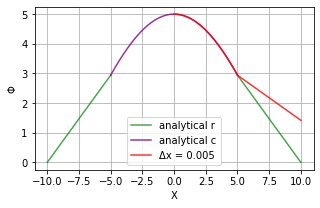

In [154]:
# compose the analytical solution
import matplotlib.pyplot as plt
import numpy as np

x1 = np.linspace(-(a/2)-b, -a/2, 100)
x2 = np.linspace(-a/2, a/2, 100)
x3 = np.linspace(a/2, a/2 + b, 100)

h1 = phi_0 * np.cos(B * a / 2)
h2 = np.sinh(L * b)
phi_1 = h1 / h2

phi3 = phi_1 * np.sinh(L * ((a/2) + b - x3))
phi2 = phi_0 * np.cos(B * x2)
phi1 = phi_1 * np.sinh(L * ((a/2) + b + x1))

deltax = 0.005
lenth = int((a/2)/deltax)
x4 = np.linspace(0, a / 2, lenth)
phi4 = [phi_0]
theta_4 = [0]

for i in range(lenth):
    theta_4.append(theta_4[i]-deltax*(B)**2*phi4[i])
    phi4.append(theta_4[i]*deltax+phi4[i])
    
deltax = 0.005
lenth = int(b/deltax)
x5 = np.linspace(a/2, a / 2 +b, lenth)
phi5 = [phi_1*np.sinh(L*b)]
theta_5 = [-(Dr/Dc)*B*phi_0*np.sin(B*a/2)]

for i in range(lenth):
    theta_5.append(theta_5[i]+deltax*(L)**2*phi5[i])
    phi5.append(theta_5[i]*deltax+phi5[i])    
    
plt.figure(figsize=(5, 3))
plt.plot(x1, phi1, c="g", alpha=0.7, label="analytical r")
plt.plot(x2, phi2, c="purple", alpha=0.8, label="analytical c")
plt.plot(x3, phi3, c="g", alpha=0.7)
plt.plot(x4, phi4[:1000],  alpha=0.8,c="r", label="Δx = 0.005")
plt.plot(x5, phi5[:1000],  alpha=0.8,c="r" )
plt.grid(True)
plt.xlabel('X')
plt.ylabel("Φ")
plt.legend()
plt.show()

In [155]:
import tensorflow as tf
from tensorflow import keras

In [169]:
def MLP(n_input, n_output, n_neuron, n_layer, act_fn='tanh'):
    tf.random.set_seed(1234)
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(
            units=n_neuron,
            activation=act_fn,
            kernel_initializer=tf.keras.initializers.GlorotNormal(),
            input_shape=(n_input,),
            name='H1')
    ])
    for i in range(n_layer-1):
        model.add(
            tf.keras.layers.Dense(
                units=n_neuron,
                activation=act_fn,
                kernel_initializer=tf.keras.initializers.GlorotNormal(),
                name='H{}'.format(str(i+2))
            ))
    model.add(
        tf.keras.layers.Dense(
            units=n_output,
            name='output'
        ))
    return model

class EarlyStopping:

    def __init__(self, patience=10, verbose=0):

        self.epoch = 0 
        self.pre_loss = float('inf') 
        self.patience = patience 
        self.verbose = verbose 

    def __call__(self, current_loss):

        if self.pre_loss < current_loss: 
            self.epoch += 1 

            if self.epoch > self.patience: 
                if self.verbose: 
                    print('early stopping')
                return True

        else: 
            self.epoch = 0 
            self.pre_loss = current_loss 

        return False


class PhysicsInformedNNs_1():

    def __init__(self, n_input, n_output, n_neuron, n_layer, epochs,act_fn='tanh'):
        self.n_input = n_input
        self.n_output = n_output
        self.n_neuron = n_neuron
        self.n_layer = n_layer
        self.epochs = epochs
        self.act_fn = act_fn
        self.model_loc = []

    def build(self, optimizer, loss_fn, early_stopping):
        self._model = MLP(self.n_input, self.n_output, self.n_neuron, self.n_layer, self.act_fn)
        self._optimizer = optimizer
        self._loss_fn = loss_fn
        self._early_stopping = early_stopping
        return self

    def train_step(self, x_data, p_data, x_pinn, B, loop,x_data_1,x_data_2):
        with tf.GradientTape() as tape_total:
            tape_total.watch(self._model.trainable_variables)
            p_pred = self._model(x_data)
            loss1 = self._loss_fn(p_pred, p_data)
            loss1 = tf.cast(loss1, dtype=tf.float32)
            
            
            p_pred_1 = self._model(x_data_1)
            p_pred_2 = self._model(x_data_2)
            loss3 = self._loss_fn(p_pred_1, p_pred_2)
            loss3 = tf.cast(loss3, dtype=tf.float32)
            

            with tf.GradientTape() as tape2:
                tape2.watch(x_pinn)
                with tf.GradientTape() as tape1:
                    tape1.watch(x_pinn)
                    p_pred_pinn = self._model(x_pinn)
                dp_dx = tape1.gradient(p_pred_pinn, x_pinn)
            dp_dx2 = tape2.gradient(dp_dx, x_pinn)

            dp_dx2 = tf.cast(dp_dx2, dtype=tf.float32)
            p_pred_pinn = tf.cast(p_pred_pinn, dtype=tf.float32)

            loss_physics = dp_dx2 +  B**2 * p_pred_pinn
            loss2 = self._loss_fn(loss_physics, tf.zeros_like(loss_physics))
            loss2 = tf.cast(loss2, dtype=tf.float32)

            loss = loss1 + loss2+ loss3

        self._optimizer.minimize(loss, self._model.trainable_variables, tape=tape_total)
        self._loss_values.append(loss)
        if loop % 50 == 0:
            print("train_step :", self.loop,"loss1 :", loss1.numpy(), "loss2 :", loss2.numpy(),"loss3 :", loss3.numpy(), "loss :", loss.numpy())
        return self

    def train(self, x, x_data, p_data, x_pinn, B,x_data_1,x_data_2):
        self.loop = 0
        self._loss_values = []
        for i in range(self.epochs):
            self.loop += 1
            self.train_step(x_data, p_data, x_pinn, B, self.loop,x_data_1,x_data_2)
            if self.loop % 500 == 0:
                model_clone = tf.keras.models.clone_model(self._model)
                model_clone.set_weights(self._model.get_weights())
                self.model_loc.append(model_clone)
            if self._early_stopping(self._loss_values[-1]):
                break

In [170]:
x_pinn = tf.linspace(-a/2,a/2,50)
x_pinn = tf.reshape(x_pinn,[-1,1])

# boundary condition
x =tf.Variable([[-a/2],[0],[a/2]], dtype=tf.float64)
p = tf.Variable([[phi_0]], dtype=tf.float64)

boundary_points = [1]
symmetry_point_1 = [0]
symmetry_point_2 = [2]
x_data = tf.gather(x, boundary_points )
p_data = tf.gather(p, [0] )
x_data_1 = tf.gather(x, symmetry_point_1 )
x_data_2 = tf.gather(x, symmetry_point_2 )

In [171]:
PINNs_1 = PhysicsInformedNNs_1(1,1,32,4,11000)
optimizer = tf.keras.optimizers.Adam(learning_rate=8e-4)
loss_fn = tf.keras.losses.MeanSquaredError()
early_stopping = EarlyStopping(patience=50,verbose=1)
PINNs_1.build(optimizer, loss_fn, early_stopping)
PINNs_1.train(x, x_data, p_data, x_pinn, B,x_data_1,x_data_2)

train_step : 50 loss1 : 8.8450365 loss2 : 0.04356475 loss3 : 0.01014376 loss : 8.898746
train_step : 100 loss1 : 0.047127504 loss2 : 0.043312658 loss3 : 0.000114015726 loss : 0.09055418
train_step : 150 loss1 : 0.0002836492 loss2 : 0.026332123 loss3 : 1.9140458e-07 loss : 0.026615964
train_step : 200 loss1 : 5.169073e-06 loss2 : 0.020746343 loss3 : 7.191971e-07 loss : 0.02075223
train_step : 250 loss1 : 4.436035e-06 loss2 : 0.017909132 loss3 : 3.195533e-07 loss : 0.01791389
train_step : 300 loss1 : 5.076259e-06 loss2 : 0.016120953 loss3 : 1.7647858e-07 loss : 0.016126206
train_step : 350 loss1 : 5.093463e-06 loss2 : 0.014803877 loss3 : 9.695418e-08 loss : 0.014809067
train_step : 400 loss1 : 4.8826123e-06 loss2 : 0.013725604 loss3 : 5.1951247e-08 loss : 0.013730539
train_step : 450 loss1 : 4.5451634e-06 loss2 : 0.012784548 loss3 : 2.7141652e-08 loss : 0.01278912
train_step : 500 loss1 : 4.130162e-06 loss2 : 0.011934336 loss3 : 9.9319095e-09 loss : 0.011938477
train_step : 550 loss1 : 3

train_step : 4100 loss1 : 5.820766e-09 loss2 : 0.00045252405 loss3 : 4.3024784e-08 loss : 0.0004525729
train_step : 4150 loss1 : 1.2995224e-07 loss2 : 0.0004451517 loss3 : 6.272305e-05 loss : 0.0005080047
train_step : 4200 loss1 : 7.781864e-09 loss2 : 0.00041143384 loss3 : 3.7544014e-06 loss : 0.000415196
train_step : 4250 loss1 : 4.520416e-09 loss2 : 0.000393455 loss3 : 4.472264e-08 loss : 0.00039350425
train_step : 4300 loss1 : 3.7252903e-09 loss2 : 0.00037602137 loss3 : 1.5663773e-09 loss : 0.00037602667
train_step : 4350 loss1 : 1.4551915e-09 loss2 : 0.00035939424 loss3 : 0.00074420345 loss : 0.0011035991
train_step : 4400 loss1 : 2.6284397e-10 loss2 : 0.00034378984 loss3 : 5.890459e-05 loss : 0.00040269468
train_step : 4450 loss1 : 3.0070169e-09 loss2 : 0.00032529168 loss3 : 6.265509e-09 loss : 0.00032530093
train_step : 4500 loss1 : 2.5547706e-09 loss2 : 0.00031051517 loss3 : 8.294819e-09 loss : 0.00031052603
train_step : 4550 loss1 : 3.1125182e-09 loss2 : 0.00029621087 loss3 : 2

In [172]:
x_test_1 = tf.linspace(-a/2,a/2, 100)
p_pred_1 = PINNs_1._model.predict(x_test_1)

4/4 [==============================] - 0s 1ms/step


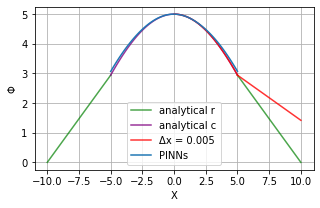

In [173]:
plt.figure(figsize=(5, 3))
plt.plot(x1, phi1, c="g", alpha=0.7, label="analytical r")
plt.plot(x2, phi2, c="purple", alpha=0.8, label="analytical c")
plt.plot(x3, phi3, c="g", alpha=0.7)
plt.plot(x4, phi4[:1000],  alpha=0.8,c="r", label="Δx = 0.005")
plt.plot(x5, phi5[:1000],  alpha=0.8,c="r" )
plt.plot(x_test_1, p_pred_1, label="PINNs" )
plt.grid(True)
plt.xlabel('X')
plt.ylabel("Φ")
plt.legend()
plt.show()

In [187]:
class PhysicsInformedNNs_2():

    def __init__(self, n_input, n_output, n_neuron, n_layer, epochs,act_fn='tanh'):
        self.n_input = n_input
        self.n_output = n_output
        self.n_neuron = n_neuron
        self.n_layer = n_layer
        self.epochs = epochs
        self.act_fn = act_fn
        self.model_loc = []

    def build(self, optimizer, loss_fn, early_stopping):
        self._model = MLP(self.n_input, self.n_output, self.n_neuron, self.n_layer, self.act_fn)
        self._optimizer = optimizer
        self._loss_fn = loss_fn
        self._early_stopping = early_stopping
        return self

    def train_step(self, x_data, p_data, x_pinn, B, loop):
        with tf.GradientTape() as tape_total:
            tape_total.watch(self._model.trainable_variables)
            p_pred = self._model(x_data)
            loss1 = self._loss_fn(p_pred, p_data)
            loss1 = tf.cast(loss1, dtype=tf.float32)
            

            with tf.GradientTape() as tape2:
                tape2.watch(x_pinn)
                with tf.GradientTape() as tape1:
                    tape1.watch(x_pinn)
                    p_pred_pinn = self._model(x_pinn)
                dp_dx = tape1.gradient(p_pred_pinn, x_pinn)
            dp_dx2 = tape2.gradient(dp_dx, x_pinn)

            dp_dx2 = tf.cast(dp_dx2, dtype=tf.float32)
            p_pred_pinn = tf.cast(p_pred_pinn, dtype=tf.float32)

            loss_physics = dp_dx2 - L**2 * p_pred_pinn
            loss2 = self._loss_fn(loss_physics, tf.zeros_like(loss_physics))
            loss2 = tf.cast(loss2, dtype=tf.float32)

            loss = loss1 + loss2

        self._optimizer.minimize(loss, self._model.trainable_variables, tape=tape_total)
        self._loss_values.append(loss)
        if loop % 50 == 0:
            print("train_step :", self.loop,"loss1 :", loss1.numpy(), "loss2 :", loss2.numpy(), "loss :", loss.numpy())
        return self

    def train(self, x, x_data, p_data, x_pinn, B):
        self.loop = 0
        self._loss_values = []
        for i in range(self.epochs):
            self.loop += 1
            self.train_step(x_data, p_data, x_pinn, B, self.loop)
            if self.loop % 500 == 0:
                model_clone = tf.keras.models.clone_model(self._model)
                model_clone.set_weights(self._model.get_weights())
                self.model_loc.append(model_clone)
            if self._early_stopping(self._loss_values[-1]):
                break

In [188]:
k = PINNs_1._model.predict([a/2])
k = tf.reshape(k, [1])
k

1/1 [==============================] - 0s 56ms/step


<tf.Tensor: shape=(1,), dtype=float32, numpy=array([3.071744], dtype=float32)>

In [189]:
x_pinn = tf.linspace(a/2,a/2 +b,50)
x_pinn = tf.reshape(x_pinn,[-1,1])

# boundary condition
x =tf.Variable([[a/2],[a/2 +b]], dtype=tf.float64)
p = tf.Variable([k,[0]], dtype=tf.float64)

boundary_points = [0,1]

x_data = tf.gather(x, boundary_points )
p_data = tf.gather(p, boundary_points )

In [190]:
PINNs_2 = PhysicsInformedNNs_2(1,1,32,4,11000)
optimizer = tf.keras.optimizers.Adam(learning_rate=8e-4)
loss_fn = tf.keras.losses.MeanSquaredError()
early_stopping = EarlyStopping(patience=50,verbose=1)
PINNs_2.build(optimizer, loss_fn, early_stopping)
PINNs_2.train(x ,x_data, p_data, x_pinn, B)

train_step : 50 loss1 : 0.7666995 loss2 : 0.0009510081 loss : 0.7676505
train_step : 100 loss1 : 0.00087981904 loss2 : 0.007746129 loss : 0.008625948
train_step : 150 loss1 : 1.3991217e-05 loss2 : 0.0066682585 loss : 0.0066822497
train_step : 200 loss1 : 5.8201014e-05 loss2 : 0.006018177 loss : 0.0060763783
train_step : 250 loss1 : 5.7188226e-05 loss2 : 0.005428402 loss : 0.0054855905
train_step : 300 loss1 : 5.064743e-05 loss2 : 0.00486529 loss : 0.004915938
train_step : 350 loss1 : 4.3679785e-05 loss2 : 0.004341094 loss : 0.004384774
train_step : 400 loss1 : 3.6930847e-05 loss2 : 0.0038633484 loss : 0.0039002793
train_step : 450 loss1 : 3.0819287e-05 loss2 : 0.0034326822 loss : 0.0034635016
train_step : 500 loss1 : 2.551302e-05 loss2 : 0.0030457017 loss : 0.0030712148
train_step : 550 loss1 : 2.1025427e-05 loss2 : 0.002697541 loss : 0.0027185665
train_step : 600 loss1 : 1.7306511e-05 loss2 : 0.0023834836 loss : 0.00240079
train_step : 650 loss1 : 1.422321e-05 loss2 : 0.0020997091 los

In [ ]:
x_test_2 = tf.linspace(a/2,a/2 + b, 100)
p_pred_2 = PINNs_2._model.predict(x_test_2)

In [ ]:
plt.figure(figsize=(5, 3))
plt.plot(x1, phi1, c="g", alpha=0.7, label="analytical r")
plt.plot(x2, phi2, c="purple", alpha=0.8, label="analytical c")
plt.plot(x3, phi3, c="g", alpha=0.7)
plt.plot(x4, phi4[:1000],  alpha=0.8,c="r", label="Δx = 0.005")
plt.plot(x5, phi5[:1000],  alpha=0.8,c="r" )
plt.plot(x_test_1, p_pred_1, c="y", label="PINNs" )
plt.plot(x_test_2, p_pred_2, c="y")
plt.grid(True)
plt.xlabel('X')
plt.ylabel("Φ")
plt.legend()
plt.show()